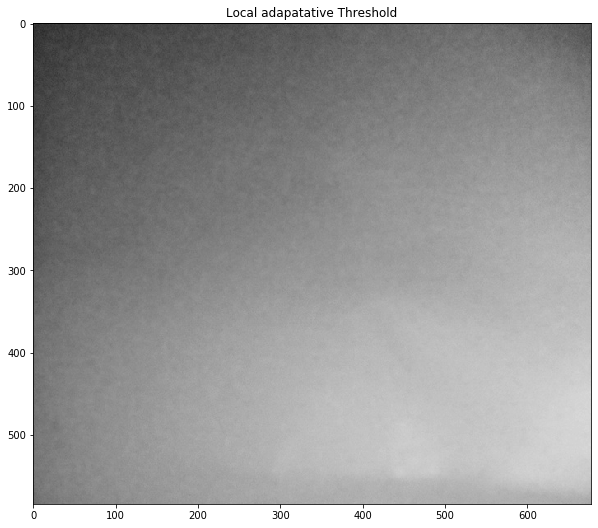

In [2]:
import cv2
import numpy as np
from skimage.feature import blob_log
from math import sqrt
import glob
from skimage.io import imread
from matplotlib import pyplot as plt
import imutils

img = cv2.imread("./deployment/node50.jpg")
img = imutils.rotate(img,180)
h = img.shape[0]
w = img.shape[1]
img = img[0:h-440,90:w]

# Local adaptative threshold
hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
hue ,saturation ,value = cv2.split(hsv)

thresh = cv2.adaptiveThreshold(value, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 255, 17)
thresh = cv2.bitwise_not(thresh)

contours, hierarchy = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

# Maximum blobs size
threshold_blobs_area = 2

# Loop over all contours and fill draw white color for area smaller than threshold.
for i in range(1, len(contours)):
    index_level = int(hierarchy[0][i][1])
    if index_level <= i:
        cnt = contours[i]
        area = cv2.contourArea(cnt)
#         print(area)
        if area <= threshold_blobs_area:
            # Draw white color for small blobs
            cv2.drawContours(thresh, [cnt], -1, 0, -1, 1)

plt.figure(figsize=(10,10))
# plt.grid(True)
plt.title('Local adapatative Threshold')
plt.imshow(value, cmap="gray", vmin=0, vmax=255)

objects number is: 1


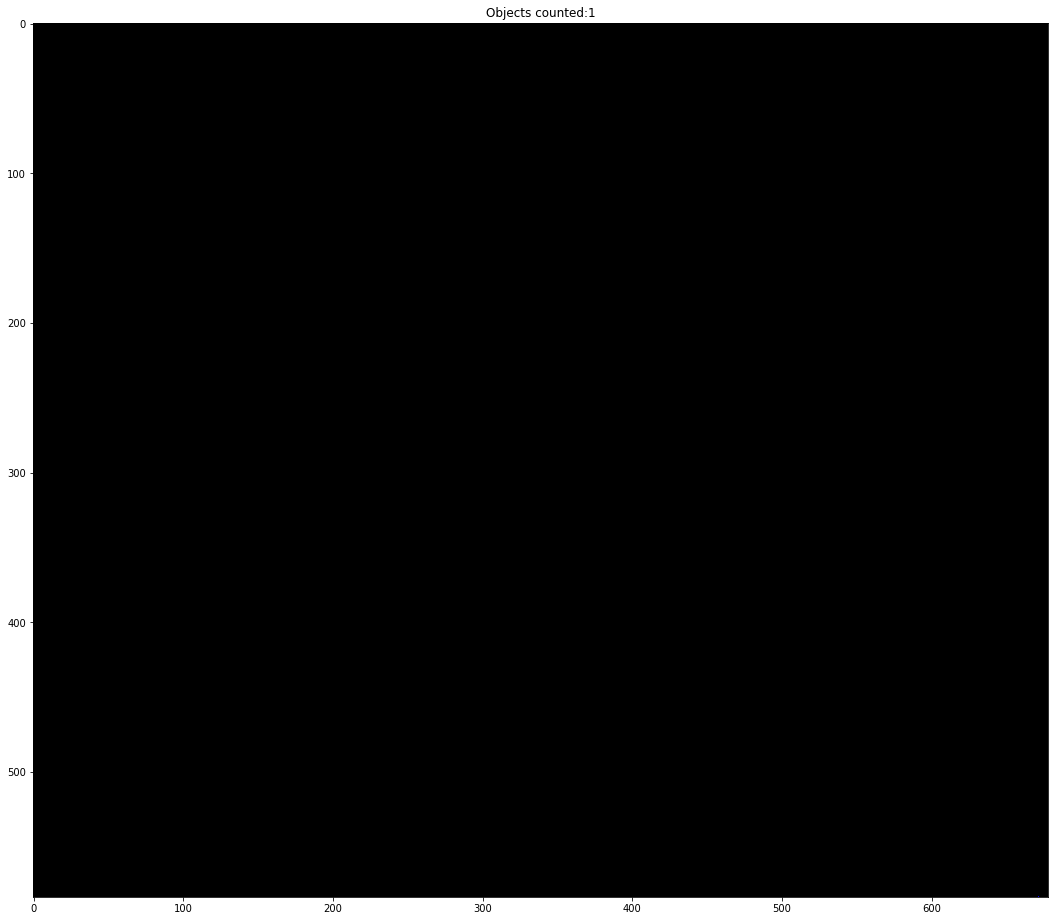

In [3]:
ret, labels = cv2.connectedComponents(thresh)
label_hue = np.uint8(179 * labels / np.max(labels))
blank_ch = 255 * np.ones_like(label_hue)
labeled_img = cv2.merge([label_hue, blank_ch, blank_ch])
labeled_img = cv2.cvtColor(labeled_img, cv2.COLOR_HSV2BGR)
labeled_img[label_hue == 0] = 0
plt.figure(figsize=(40,40))
plt.subplot(222)
plt.title('Objects counted:'+ str(ret-1))
plt.imshow(labeled_img)
print('objects number is:', ret-1)
plt.show()